In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from NeuralNetworkModel import *
from tqdm import tqdm


In [2]:
df = pd.read_csv('train.csv')
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
x_train = df.drop(columns='label')
y_train = df['label']
print('x train :\n', x_train)
# print('\ny train :\n', y_train)

x train :
        pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995       0       0       0       0       0       0       0       0       0   
41996       0       0       0       0       0       0       0       0       0   
41997       0       0       0       0       0       0       0       0       0   
41998       0       0       0       0       0       0       0       0       0   
41999       0       0       0       0       0       0       0       0       0   

       pixel9  .

#### Convert image from gray to black and white

In [4]:
def convert(img):
    for i in range(len(img)):
        for j in range(len(img[i])):
            if img[i][j] > 0:
                img[i][j] = 1
    return img

#### Image before convert

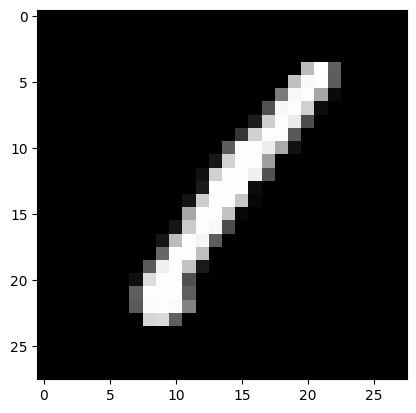

In [5]:
data = np.array(x_train.iloc[0, :]).reshape(28, 28)
plt.imshow(data, cmap='gray')

#### Image after convert

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 

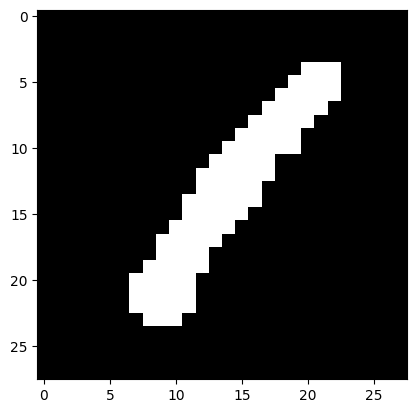

In [6]:
data = convert(data)
plt.imshow(data, cmap='gray')
print(data)

#### Convert X train

**X train after convert**

In [7]:
print("unique value of first x_train :\n", x_train.iloc[0, :].unique())
print()
print("x_train value :\n", x_train.iloc[0, :].values)


unique value of first x_train :
 [  0 188 255  94 191 250 253  93 123 248 167  10  80 247 208  13  29 207
 235  77  54 209  88 254 238 170  17  23 210 159  16 240  81  27  20 206
 198   7 168 196 203  76  22 245 103  89 195  25  15 220 251 131 214 218
  95]

x_train value :
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 188 255  94   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 191 250 253
  93   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

**X_train before convert**

In [8]:
def convert_data(x_train):
    for i in range(len(x_train)):
        xi = x_train.iloc[i, :]
        img = np.array(xi).reshape(28, 28)
        con = convert(img)
        x_train.iloc[i, :] = np.array(con).reshape(784, )
        
convert_data(x_train)

take a random sample in x_train and visualize

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 

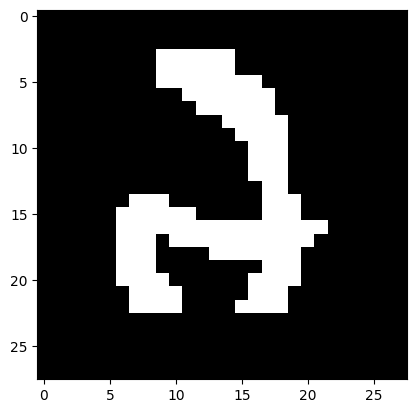

In [9]:
rand = np.random.randint(0, 42000)
x_rand = x_train.iloc[rand, :]
x_rand = np.array(x_rand).reshape(28, 28)
print(x_rand)
plt.imshow(x_rand, cmap='gray')


#### One hot coding

In [10]:
def one_hot_coding(y_train):
    m = len(y_train.unique())
    y_new = []
    for i in y_train.values:
        y_n = [0] * m
        y_n[i] = 1
        y_new.append(y_n)
    y_new = pd.DataFrame(y_new)
    return y_new

#### Label before one hot

In [11]:
print("label :", y_train[0])
print('shape :', y_train[0].shape)

label : 1
shape : ()


#### Label after one hot

In [12]:
y_train_one_hot = one_hot_coding(y_train)
y_train_one_hot.index = y_train
print(y_train_one_hot)

       0  1  2  3  4  5  6  7  8  9
label                              
1      0  1  0  0  0  0  0  0  0  0
0      1  0  0  0  0  0  0  0  0  0
1      0  1  0  0  0  0  0  0  0  0
4      0  0  0  0  1  0  0  0  0  0
0      1  0  0  0  0  0  0  0  0  0
...   .. .. .. .. .. .. .. .. .. ..
0      1  0  0  0  0  0  0  0  0  0
1      0  1  0  0  0  0  0  0  0  0
7      0  0  0  0  0  0  0  1  0  0
6      0  0  0  0  0  0  1  0  0  0
9      0  0  0  0  0  0  0  0  0  1

[42000 rows x 10 columns]


#### Model

In [13]:
model = DeepNeuralNetwork(
    Layer(28*28),
    Layer(64, activation_func='relu'),
    Layer(64, activation_func='relu'),
    Layer(10, activation_func='softmax', train_bias=False)
)

**check forward pass**

In [14]:
single_x_train = x_train.iloc[0, :].to_numpy().reshape(784, 1)
single_y_train = y_train_one_hot.iloc[0, :]
print('x train shape :\n', single_x_train.shape)
print('y train shape :\n', single_y_train.shape)

x train shape :
 (784, 1)
y train shape :
 (10,)


In [15]:
output = model.forward(single_x_train)
print('activation cache :\n', output[0][-1])
print('linear cache :\n', output[1][-1])
print('output\n', output[0][-1])

activation cache :
 [[4.44648232e-04]
 [8.38416425e-02]
 [9.71307399e-04]
 [7.29770987e-02]
 [4.73824638e-01]
 [1.33784230e-02]
 [1.14247858e-02]
 [1.24553264e-01]
 [1.14953480e-01]
 [1.03630713e-01]]
linear cache :
 [[43.90756927]
 [49.14697088]
 [44.68892879]
 [49.00818675]
 [50.87887836]
 [47.31168425]
 [47.15382626]
 [49.54277452]
 [49.46256859]
 [49.35887481]]
output
 [[4.44648232e-04]
 [8.38416425e-02]
 [9.71307399e-04]
 [7.29770987e-02]
 [4.73824638e-01]
 [1.33784230e-02]
 [1.14247858e-02]
 [1.24553264e-01]
 [1.14953480e-01]
 [1.03630713e-01]]


**training**

In [16]:
def fit(x_train, y_train, lr = 0.01, batch_size = 32, epochs = 1000):
    N, d = x_train.shape
    for it in tqdm(range(epochs)):
        rand_id = np.random.choice(N, size=batch_size, replace=False)
        for i in rand_id:
            xi = np.array([x_train.iloc[i, :]]).T
            yi = np.array([y_train.iloc[i, :]]).T
            activation_cache, linear_cache = model.forward(xi)
            model.backpropagation(linear_cache, activation_cache, yi)
            model.update(lr = lr)

In [17]:
fit(x_train, y_train_one_hot, batch_size=64)

100%|██████████| 1000/1000 [01:28<00:00, 11.30it/s]


In [18]:
y_train.to_numpy()

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [19]:
y_pred = model.predict(x_train)
y_pred

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

**accuracy**

In [20]:
acc = model.accuracy(y_train, y_pred)
print("accuracy :", acc)

accuracy : 0.9463571428571429


## Test Dataset

#### Read data

In [21]:
x_test = pd.read_csv('test.csv')
x_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Convert Data

In [22]:
convert_data(x_test)

take a random data in x test and visualize

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 

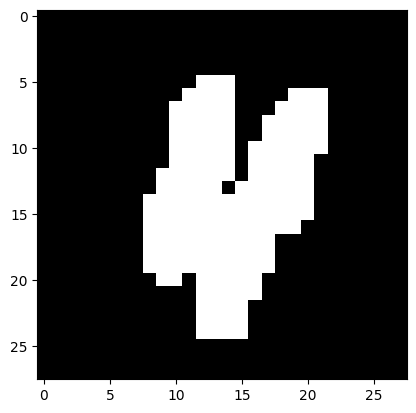

In [23]:
rand = np.random.randint(0, 28000)
x_rand = x_test.iloc[rand, :]
x_rand = np.array(x_rand).reshape(28, 28)
print(x_rand)
plt.imshow(x_rand, cmap='gray')

### Predict test set

In [26]:
def predict_test_set():
    rand = np.random.randint(0, 28000)
    x_rand = x_test.iloc[rand, :]
    x_rand = np.array(x_rand).reshape(28, 28)
    # print(x_rand)
    plt.imshow(x_rand, cmap='gray')
    plt.show()
    y_pred = model.predict_single_point(x_rand.reshape(784, 1))
    print("y_predict :", y_pred)

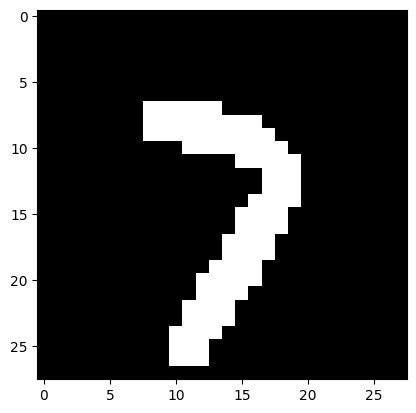

y_predict : 7


In [78]:
predict_test_set()